<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

---

## Exploratory Data Analysis

Complete the following steps to explore the imported datasets. Other data sets in the directory are used as markers for interpretations.

### Imports

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [ ]:
act_states = pd.read_csv('../data-clean/act_clean.csv') 
sat_states = pd.read_csv('../data-clean/sat_clean.csv')
colleges = pd.read_csv('../data-clean/colleges_clean.csv')

### I. 
### Summary Statistics for each column.

### National ACT Participation

In [ ]:
# Sumary Statistics
act_states.describe()

,year,participation,composite
count,156.000000,156.000000,156.000000
mean,2018.000000,0.614551,21.501282
std,0.819126,0.334412,2.087010
min,2017.000000,0.060000,17.700000
25%,2017.000000,0.290000,19.800000
50%,2018.000000,0.655000,21.250000
75%,2019.000000,1.000000,23.625000
max,2019.000000,1.000000,25.600000


On average, 61% of states participated in ACT testing. The highest participation rates reach 100%, with at least one state only having a 6% paticipation rate. 

Over a three year period, the mean composite score was about a 21.5 with 75% of student scoring at least a 23.6. The highest average state score was a 25.6, and the lowest score being a 17.7.

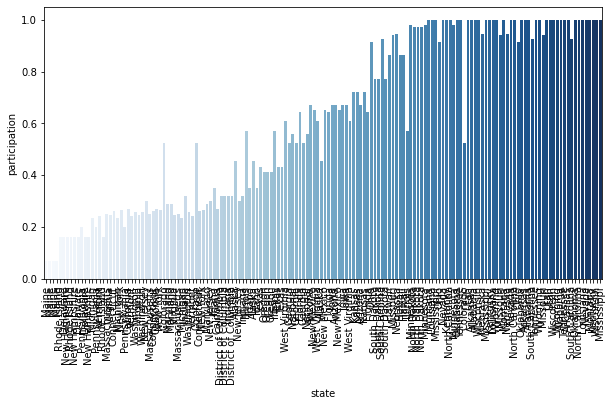

In [10]:
# Distribution of Participation, ordered by state
plt.figure(figsize=(10,5))
sns.barplot(data=act_states, 
            x = act_states.groupby(by='state').mean()['participation'].index, 
            y = act_states.groupby(by='state').mean()['participation'], 
            order=act_states.sort_values('participation').state, 
            palette='Blues')

plt.xticks(rotation = 90);

Participation rates vary widely across all 50 states. 

In [42]:
#composite scores for 100% participation states
act_states.loc[(act_states['participation'] >= 1) & (act_states['year'] == 2019),:].sort_values('composite')

,year,state,participation,composite
132,2019,Nevada,1.0,17.9
128,2019,Mississippi,1.0,18.4
122,2019,Louisiana,1.0,18.8
104,2019,Alabama,1.0,18.9
140,2019,Oklahoma,1.0,18.9
137,2019,North Carolina,1.0,19.0
107,2019,Arkansas,1.0,19.3
146,2019,Tennessee,1.0,19.4
121,2019,Kentucky,1.0,19.8
130,2019,Montana,1.0,19.8


For the most recent data, composite scores (range(17.9, 20.3)) below the national mean (21.5) for the highest participating states (100%).

In [43]:
#composite scores for low participation states
act_states.loc[(act_states['participation'] <= .61) & (act_states['year'] == 2019),:].sort_values('composite')

,year,state,participation,composite
105,2019,Alaska,0.38,20.1
113,2019,Florida,0.54,20.1
147,2019,Texas,0.39,20.5
155,2019,National,0.52,20.7
152,2019,West Virginia,0.49,20.8
141,2019,Oregon,0.42,21.1
114,2019,Georgia,0.49,21.4
151,2019,Washington,0.24,22.1
124,2019,Maryland,0.28,22.3
116,2019,Idaho,0.31,22.5


Composite scores (range(20.1-25.5)) within one or more positive standard deviations (2.08) from the national mean (21.5) for lowest participating states (<61%).

### National SAT Participation

In [44]:
# Summary Statistics
sat_states.describe()

,year,participation,total
count,153.000000,153.000000,153.000000
mean,2018.000000,0.448693,1119.732026
std,0.819178,0.370944,94.162654
min,2017.000000,0.020000,943.000000
25%,2017.000000,0.040000,1053.000000
50%,2018.000000,0.500000,1099.000000
75%,2019.000000,0.760000,1210.000000
max,2019.000000,1.000000,1298.000000


Lower than the ACT, on average, 44% of states participated in SAT testing. The highest participation rates still reach 100%, while at least one state only having a 2% paticipation rate.

Over a three year period, the mean total score was about a 1119.7 with 75% of students scoring at least a 1210. The highest average state score was a 1298 and the lowest score being a 943.

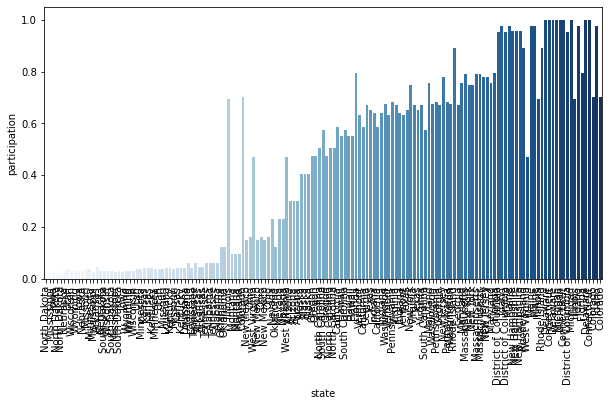

In [ ]:
# Distribution of Participation, ordered by state
plt.figure(figsize=(10,5))
sns.barplot(data=sat_states, 
            x = sat_states.groupby(by='state').mean()['participation'].index, 
            y = sat_states.groupby(by='state').mean()['participation'], 
            order=sat_states.sort_values('participation').state, 
            palette='Blues')

plt.xticks(rotation = 90);

Compared to ACT participation rates, SAT participation ranges widely. The states with low participation rates from the ACT had seemingly even lower participation rates for the SAT. The states that had 100% participation for ACT had fewer instances of 100% participation for the SAT. 

Is the SAT less popular?  If so, why?

In [47]:
#composite scores for 100% participation states
sat_states = sat_states.rename(columns={'total': 'composite'})
sat_states.loc[(sat_states['participation'] >= 1) & (sat_states['year'] == 2019),:].sort_values('composite')

,year,state,participation,composite
109,2019,Delaware,1.0,985
114,2019,Idaho,1.0,993
141,2019,Rhode Island,1.0,995
111,2019,Florida,1.0,999
124,2019,Michigan,1.0,1003
115,2019,Illinois,1.0,1013
107,2019,Colorado,1.0,1024
108,2019,Connecticut,1.0,1046


For the most recent data, composite scores (range(985-1046)) below the national mean (≈1120) for the highest participating states (100%).

In [49]:
#composite scores for low participation states
sat_states = sat_states.rename(columns={'total': 'composite'})
sat_states.loc[(sat_states['participation'] <= .44) & (sat_states['year'] == 2019),:].sort_values('composite')

,year,state,participation,composite
138,2019,Oklahoma,0.22,963
133,2019,New Mexico,0.18,1073
103,2019,Alaska,0.41,1097
137,2019,Ohio,0.19,1097
104,2019,Arizona,0.31,1134
105,2019,Arkansas,0.06,1141
102,2019,Alabama,0.07,1143
130,2019,Nevada,0.20,1156
128,2019,Montana,0.09,1199
120,2019,Louisiana,0.05,1200


Composite scores (range(963-1284)) spread positively and negatively around the national mean (≈1120) for lowest participating states (<44%).

### College Admissions Data

In [50]:
# Summary Statistics
colleges.describe()

,test_optional?,policy_period,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
count,416.000000,390.000000,416.000000,416.000000,410.000000,410.000000,410.000000,410.000000
mean,0.834135,0.779487,17481.759615,0.557034,1167.008537,1358.892683,24.712927,29.889756
std,0.372408,0.888423,17447.621897,0.242117,129.586121,111.431443,4.127758,3.154675
min,0.000000,0.000000,211.000000,0.043000,793.000000,1050.000000,15.000000,19.000000
25%,1.000000,0.000000,5313.000000,0.376250,1070.000000,1270.000000,22.000000,28.000000
50%,1.000000,1.000000,11622.000000,0.613000,1150.000000,1350.000000,24.000000,30.000000
75%,1.000000,1.000000,23599.750000,0.742250,1250.000000,1440.000000,28.000000,32.000000
max,1.000000,5.000000,111322.000000,0.999000,1530.000000,1580.000000,35.000000,36.000000


In [54]:
colleges.loc[(colleges['policy_period']== 0) & (colleges['test_optional?'] == 1),:].sort_values('accept_rate')

,school,test_optional?,policy_period,policy_details,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
8,University of Chicago,1,0.0,UChicago offers a test optional policy which a...,32283,0.073,1490.0,1570.0,33.0,35.0
12,Bowdoin College,1,0.0,Bowdoin College offers a test optional policy ...,9332,0.088,1330.0,1520.0,31.0,34.0
23,Bates College,1,0.0,Bates offers a test optional policy which allo...,8222,0.121,1270.0,1480.0,29.0,33.0
28,Colby College,1,0.0,Colby College offers a test optional policy wh...,12313,0.130,1350.0,1510.0,31.0,33.0
29,Pitzer College,1,0.0,Pitzer offers a test optional policy which all...,4358,0.133,1340.0,1490.0,30.0,33.0
...,...,...,...,...,...,...,...,...,...,...
375,Weber State,1,0.0,Weber State University offers a test optional ...,6853,0.891,NaN,NaN,18.0,24.0
380,Washington College,1,0.0,Ursinus College has a test-optional policy whi...,2225,0.924,1090.0,1300.0,20.0,29.0
385,University of Toledo,1,0.0,University of Toledo offers a test optional po...,10228,0.951,1000.0,1240.0,20.0,26.0
387,Portland State,1,0.0,Portland State offers a test optional policy w...,7821,0.961,1010.0,1230.0,18.0,25.0


One of the permanent policy schools, University of Chicago, is also one of the most competitive schools(below accept_rate 25th percentile), with an acceptance rate (7%) two standard deviations (2 * 0.24) away from the mean acceptance rate (55%). This means you are not required to take a standardized test and still have the chance to be admitted into a highly competitive school.

There are significantly less competitive schools (above accept_rate 75th percentile) that have permanent policies. This makes them even more accessible to students who don't submit standardized tests.

In [66]:
colleges.iloc[8,3]

'UChicago offers a test optional policy which allows students to be considered for admission without SAT or ACT scores. '

In [65]:
colleges.iloc[388,3]

'Queens University of Charlotte offers a test optional policy which allows students to be considered for admission without SAT or ACT scores though they encourage applicants to submit scores.'

Even though Queens University of Charlotte (accept_rate == 96.2%) is a less competitive school than UChicago (accept_rate == 7.3%), their policy details include an encouragement to 'submit scores'. Uchicago does not include this in their test optional policy.

* How could encouragement of submitted scores be measure? 
    * Is there data on the number of student applicants who submitted scores? 
    * Or, rejection data that includes applicant submission data? 

**Access to such information is most likely to be accessed within the university. It would be up to the school to take these measurements for themselves to determine a more true interpretation.**

* Why should you or should you not encourage scores, but still recommend test submissions? 
    * Some students score well (see participation v composite)
    * Competitiveness (slightly refuted in practice)
    * Standardized test score the few or only other requirement for application

### II. 
### Using a dictionary comprehension to apply the standard deviation function created in part 1 to each numeric column in the dataframe without loops.
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
    - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

#### Apply standard deviation

In [68]:
def find_mean(data):
    return sum(data)/len(data)

find_mean([1, 2, 3, 4, 5])

3.0

In [69]:
def find_std(data):
    sq_differences = [(x - find_mean(data))**2 for x in data]
    variance = (sum(sq_differences)) / (len(data) - 1)
    return variance**.5

In [70]:
# Apply find_std to all cols in all three data sets
act_std = {col.name:find_std(col) for col in [act_states[i] for i in act_states.columns if (act_states[i].dtype=='float64') or (act_states[i].dtype=='int64')]}

ACT participation rates are spread out by .33% deviations from the mean 61%. Composite scored spread by about 2.1 points from the mean of score of 21.5.

In [71]:
sat_std = {col.name:find_std(col) for col in [sat_states[i] for i in sat_states.columns if (sat_states[i].dtype=='float64') or (sat_states[i].dtype=='int64')]}
sat_std

{'year': 0.8191780219091253,
 'participation': 0.37094419499869996,
 'composite': 94.16265368582815}

SAT participation rates are spread out by .37% deviations from the mean 44%. Composite scored spread by about 94.2 points from the mean of score of 21.5.

In [72]:
colleges_std = {col.name:find_std(col) for col in [colleges[i] for i in colleges.columns if (colleges[i].dtype=='float64') or (colleges[i].dtype=='int64')]}
colleges_std

{'test_optional?': 0.3724076289175556,
 'policy_period': nan,
 'number_of_applicants': 17447.621896984947,
 'accept_rate': 0.24211741415722973,
 'sat_q1': nan,
 'sat_q3': nan,
 'act_q1': nan,
 'act_q3': nan}

The number of applicants deviates by about 17_447 students, which is fitting for a range of 211 applicants to over 111_000. The acceptance rate spreads by 0.24% from the mean acceptance rate of 55.7%.

In [73]:
print(f"'act_q1': {colleges['act_q1'].std()}")
print(f"'act_q3': {colleges['act_q3'].std()}")
print(f"'sat_q1': {colleges['sat_q1'].std()}")
print(f"'sat_q3': {colleges['sat_q3'].std()}")

'act_q1': 4.127758465042877
'act_q3': 3.1546747923519165
'sat_q1': 129.58612149988807
'sat_q3': 111.4314428247118


ACT scores deviate from the mean range of 24.7 to 29.9 by 4.12 and 3.15 points, respectively. SAT scores deviate from the mean range of 24.7 to 29.9 by 129.6 and 111.43 points. The 25th percentiles of the both tests deviated from their mean values greater than the 75th percentiles. This indicates that the lowest scores have a wider spread than the high scores. 

#### Scale and merge test data
Scaling the data using StandardScaler() replaces numeric row values with z-scores. This allows for comparing distributions across different units.

In [74]:
# Use StandardScaler() to scale scores and participation data
from sklearn.preprocessing import StandardScaler


In [75]:
# Scale ACT Data
act_states['participation'] = StandardScaler().fit_transform(act_states[['participation']])
act_states['composite'] = StandardScaler().fit_transform(act_states[['composite']])

act_states = act_states[act_states.state != 'National']
act_states.head()

,year,state,participation,composite
1,2017,Alabama,1.156328,-1.106221
2,2017,Alaska,0.106345,-0.817802
3,2017,Arizona,0.016346,-0.865872
4,2017,Arkansas,1.156328,-1.010081
5,2017,California,-0.913640,0.624291


California is the only state from this output that has a lower ACT participation than the mean, as indicated by its negative z-score values. However, California is also the only state in this output that scored about the composite mean, per its positive z-score value.

In [76]:
# Scale SAT Data
sat_states = sat_states.rename(columns={'total':'composite'})
sat_states['participation'] = StandardScaler().fit_transform(sat_states[['participation']])
sat_states['composite'] = StandardScaler().fit_transform(sat_states[['composite']])

sat_states.head()

,year,state,participation,composite
0,2017,Alabama,-1.078335,0.482321
1,2017,Alaska,-0.185792,-0.423337
2,2017,Arizona,-0.402166,-0.039764
3,2017,Arkansas,-1.132429,0.940477
4,2017,California,0.219910,-0.689707


In [77]:
sat_states.sort_values(by='participation').head(10)

,year,state,participation,composite
85,2018,North Dakota,-1.159475,1.739587
24,2017,Mississippi,-1.159475,1.302741
15,2017,Iowa,-1.159475,1.654349
136,2019,North Dakota,-1.159475,1.526491
34,2017,North Dakota,-1.159475,1.451908
129,2019,Nebraska,-1.132429,1.494527
44,2017,Utah,-1.132429,1.260121
49,2017,Wisconsin,-1.132429,1.824826
50,2017,Wyoming,-1.132429,1.174883
66,2018,Iowa,-1.132429,1.547801


In [78]:
act_states.sort_values(by='participation').head(10)

,year,state,participation,composite
123,2019,Maine,-1.663628,1.345337
72,2018,Maine,-1.633629,1.201128
71,2018,Maine,-1.633629,1.201128
20,2017,Maine,-1.603629,1.345337
143,2019,Rhode Island,-1.483631,1.537616
111,2019,Delaware,-1.453631,1.249197
133,2019,New Hampshire,-1.423632,1.681825
92,2018,Rhode Island,-1.393632,1.297267
82,2018,New Hampshire,-1.363633,1.729895
59,2018,Delaware,-1.333633,1.104988


California is the only value shown whose SAT participation rate is higher than the mean, as indicated by its positive z-score. The negative z-scores in the total represent values that are less than the mean composite score.

In [79]:
# Merge scaled ACT/SAT participation rate and mean composite scores
act_states['test'] = 'ACT'
sat_states['test'] = 'SAT'
states = pd.concat([act_states, sat_states], ignore_index=True)

print(f'ACT: {act_states.shape}')
print(f'SAT: {sat_states.shape}')
print(f'ACT/SAT: {states.info()}')

ACT: (154, 5)
SAT: (153, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           307 non-null    int64  
 1   state          307 non-null    object 
 2   participation  307 non-null    float64
 3   composite      307 non-null    float64
 4   test           307 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 12.1+ KB
ACT/SAT: None


### Export data for Visualizations

In [ ]:
#colleges.to_csv('../data-clean/colleges_viz.csv')

In [ ]:
#states.to_csv('../data-clean/states_viz.csv')

### III. 
### Investigate trends in the data based on questions related to the problem statement.
Interpretations of correlation strengths based on chart by [Parvez Ahammad](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8).

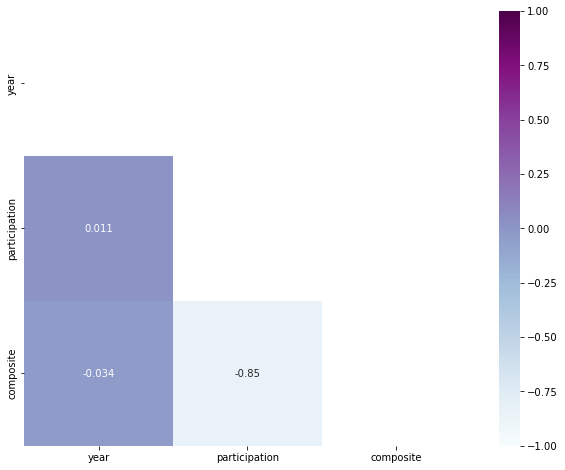

In [100]:
# Correlations from States
mask = np.zeros_like(states.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.heatmap(states.corr(), annot=True, mask=mask, cmap='BuPu', vmin=-1, vmax=1);

**Negative Correlations:** participation v composite scores(-0.85, very high), composite v year (negligible)

**Positive Correlations:** participation v year(negligible)

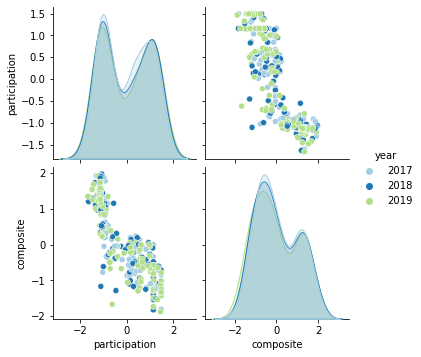

In [115]:
# Show binomial distributions for all variables in states
sns.pairplot(data=states, hue='year', palette="Paired");

composite v participation appears to be a bimodal distribution. The two peaks represent that there may be two modes.

In [121]:
# look at labels on highest peaks in the graph 
# global maximum value

# local maximum value

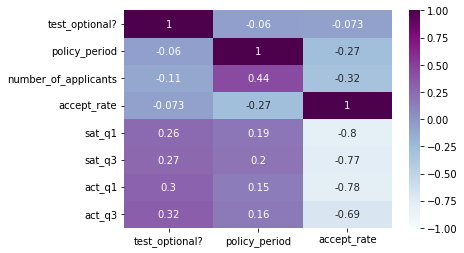

In [12]:
# Correlations for non-score factors in colleges
colleges_coef_plot = sns.heatmap(colleges.corr()[['test_optional?', 'policy_period', 'accept_rate']], 
            vmin=-1, vmax=1,
            annot=True, cmap='BuPu');

fig1 = colleges_coef_plot.get_figure()
fig1.savefig('../viz/colleges_coef_plot.png');

#### `test_optional?`
All negligible correlations. For future evaluations, focus on differences between groups through hypothesis testing.

In [13]:
colleges.describe()

,test_optional?,policy_period,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
count,416.000000,390.000000,416.000000,416.000000,410.000000,410.000000,410.000000,410.000000
mean,0.834135,0.779487,17481.759615,0.557034,1167.008537,1358.892683,24.712927,29.889756
std,0.372408,0.888423,17447.621897,0.242117,129.586121,111.431443,4.127758,3.154675
min,0.000000,0.000000,211.000000,0.043000,793.000000,1050.000000,15.000000,19.000000
25%,1.000000,0.000000,5313.000000,0.376250,1070.000000,1270.000000,22.000000,28.000000
50%,1.000000,1.000000,11622.000000,0.613000,1150.000000,1350.000000,24.000000,30.000000
75%,1.000000,1.000000,23599.750000,0.742250,1250.000000,1440.000000,28.000000,32.000000
max,1.000000,5.000000,111322.000000,0.999000,1530.000000,1580.000000,35.000000,36.000000


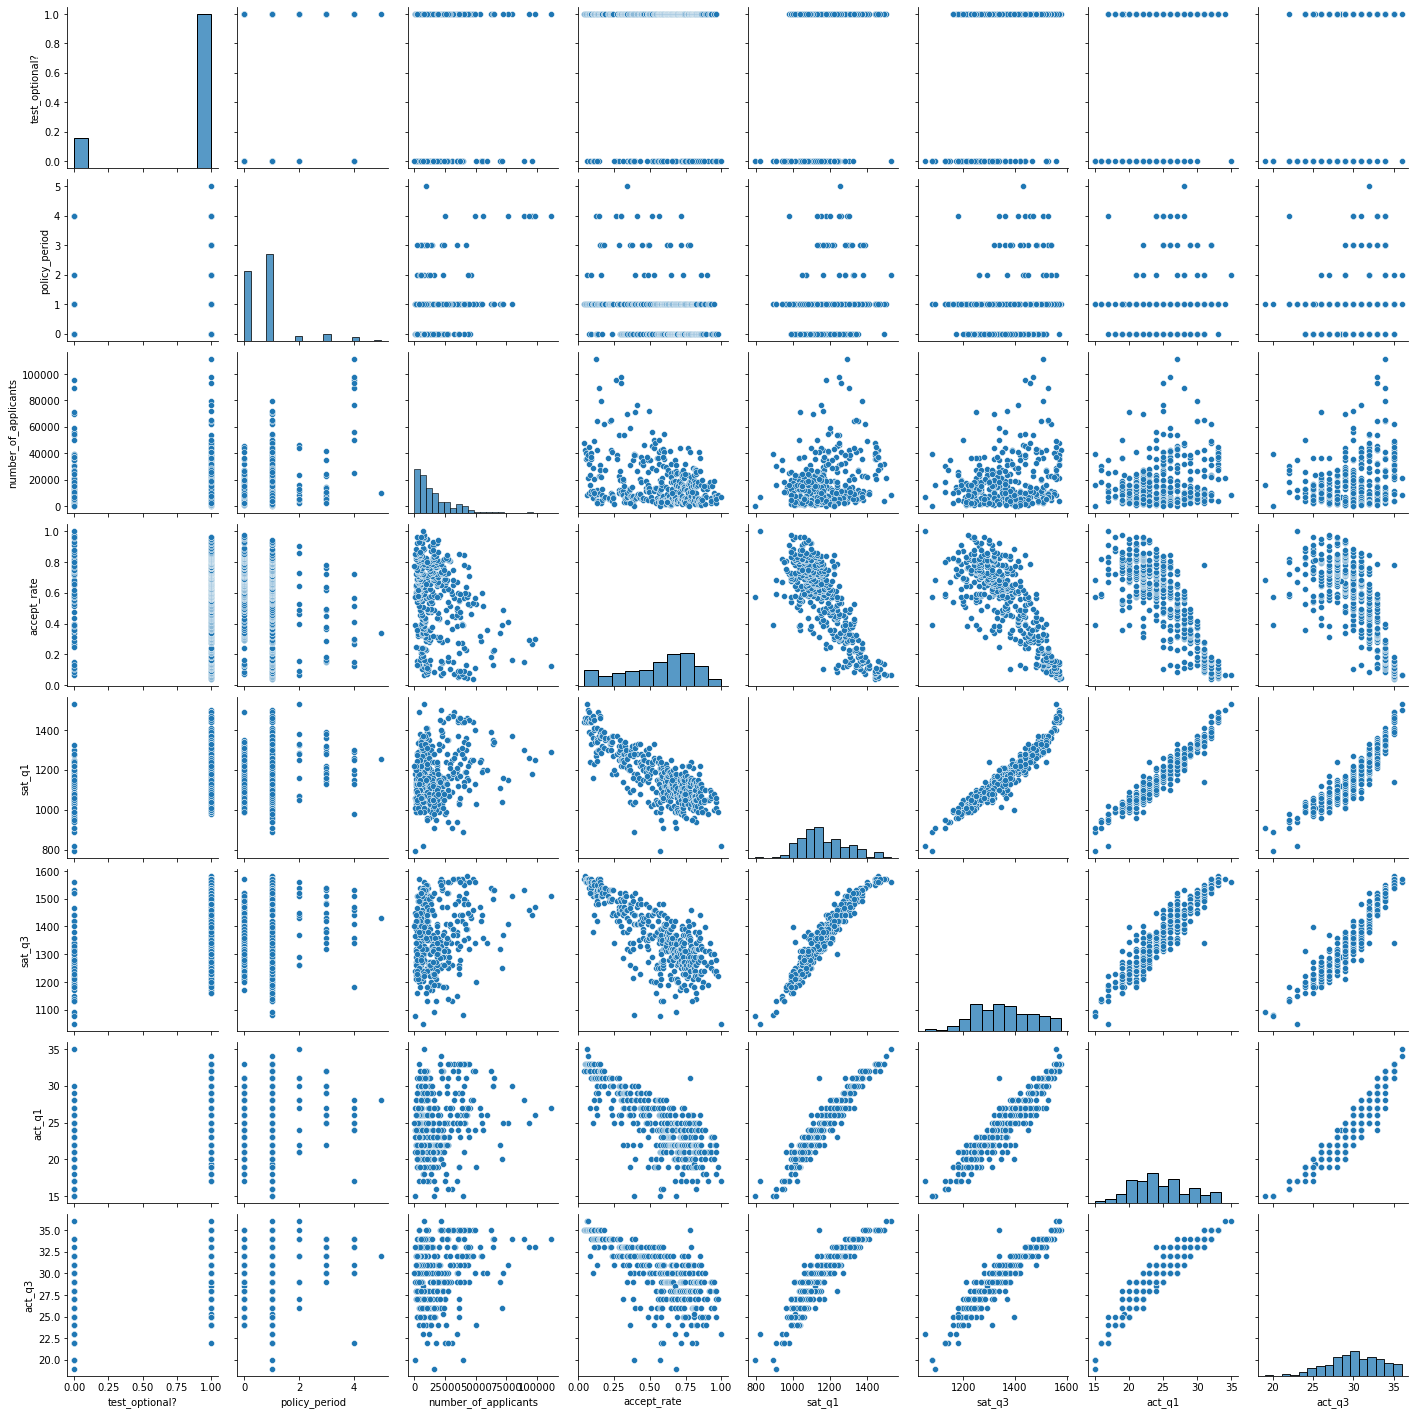

In [119]:
# Show binomial distributions for all variables in colleges
sns.pairplot(data=colleges, palette="Paired");

Based on the above visuals:
* normal to positive distbution between number_of_applicants and AXT/SAT ranges
* negative distributions for acceptance rate and AXT/SAT ranges
* positive correlations between all ACT/SAT ranges

#### `policy_period`
**Correlations:** number_of_applicants(low positive)
all others are negligible

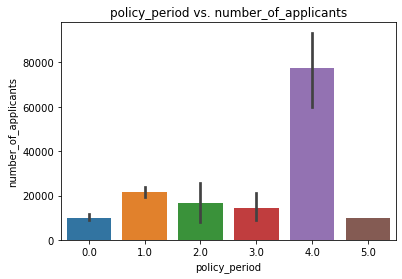

In [127]:
# Plot policy_period vs. number_of_applicants
sns.barplot(data = colleges, x = 'policy_period', y = 'number_of_applicants')
plt.title('policy_period vs. number_of_applicants');

#### `accept_rate`
**Negative correlations:** sat and act quartile ranges(moderate to high negative)

**Positive Correlations:** number_of_applicants(low)

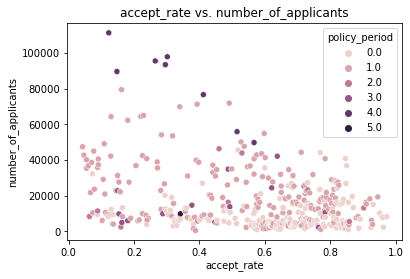

In [131]:
# Plot policy_period vs. number_of_applicants
sns.scatterplot(data = colleges, x = 'accept_rate', y = 'number_of_applicants', hue='policy_period')
plt.title('accept_rate vs. number_of_applicants');

Although the correlation value between accept_rate and policy_period was considered neglible at -0.32, there appears to be a linear relationship between the two variables.

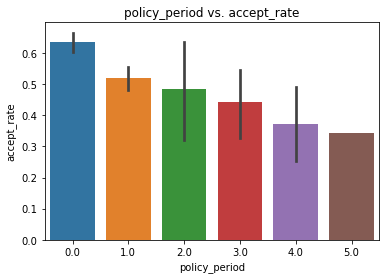

In [135]:
# Plot policy_period vs. number_of_applicants
sns.barplot(data = colleges, x = 'policy_period', y = 'accept_rate')
plt.title('policy_period vs. accept_rate');

* All test-rquired rows had NaN values in place for policy_period, so this only visualizes test-optional rows.
* The 0 value is permanent test-optional policies. Now, able to see this group has the highest average acceptance rate with one of the lowest errors. This could be influenced by the range of acceptance rates for schools with permanent policies (7-96.2%)
* no error bar for 5-year period (5.0), so safe to say that it is quite accurate. Schools with competitive acceptance rates (below 25th percentile) have some of the longest policy periods.
* other error bars indicate that the group mean acceptance rate could be higher or lower.

Text(0.5, 1.0, 'sat_q3')

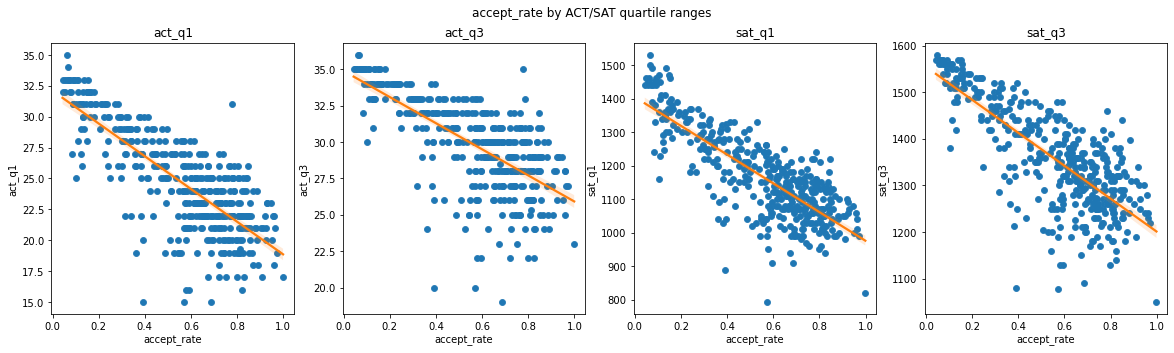

In [176]:
# Subplot of accept_rate by ACT/SAT quartile ranges
#https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-https://seaborn.pydata.org/tutorial/regression.html
#https://seaborn.pydata.org/tutorial/regression.html
# act_q1 = colleges['act_q1']
# act_q3 = colleges['act_q3']
# sat_q1 = colleges['sat_q1']
# sat_q3 = colleges['sat_q3']

fig, ax = plt.subplots(1,4, figsize=(20,5))
fig.suptitle('accept_rate by ACT/SAT quartile ranges')

#act_q1
sns.scatterplot(ax=ax[0], data=colleges, x='accept_rate', y='act_q1', palette='Blues')
sns.regplot(ax=ax[0], data=colleges, x='accept_rate', y='act_q1', line_kws={"color": "C1"})
ax[0].set_title(act_q1.name)

#act_q3
sns.scatterplot(ax=ax[1], data=colleges, x='accept_rate', y='act_q3', palette='Blues')
sns.regplot(ax=ax[1], data=colleges, x='accept_rate', y='act_q3', line_kws={"color": "C1"})
ax[1].set_title(act_q3.name)

#sat_q1
sns.scatterplot(ax=ax[2], data=colleges, x='accept_rate', y='sat_q1', palette='Blues')
sns.regplot(ax=ax[2], data=colleges, x='accept_rate', y='sat_q1', line_kws={"color": "C1"})
ax[2].set_title(sat_q1.name)

#sat_q3
sns.scatterplot(ax=ax[3], data=colleges, x='accept_rate', y='sat_q3', palette='Blues')
sns.regplot(ax=ax[3], data=colleges, x='accept_rate', y='sat_q3', line_kws={"color": "C1"})
ax[3].set_title(sat_q3.name)

After fitting the regression line using `regplot`, the negative relationship between accept_rate and ACT/SAT quartile ranges is more clear. From these visuals, we could infer that the lower the acceptance rate, the higher the lowest 25th percentile score. 

This means that the most competitive schools are ones not only have low acceptance rates, but the barrier to entry is also higher. 

From previous findings, it was clear that the state participation rates negatively correlated with state composite scores. With this new information, it is possible that there may be more barriers to admittance for schools with high testing participation if the students are more likely to score lower on the test. If test scores are heavily weighed in the admissions process, this could disproportionately affect the students in these high participation states. 

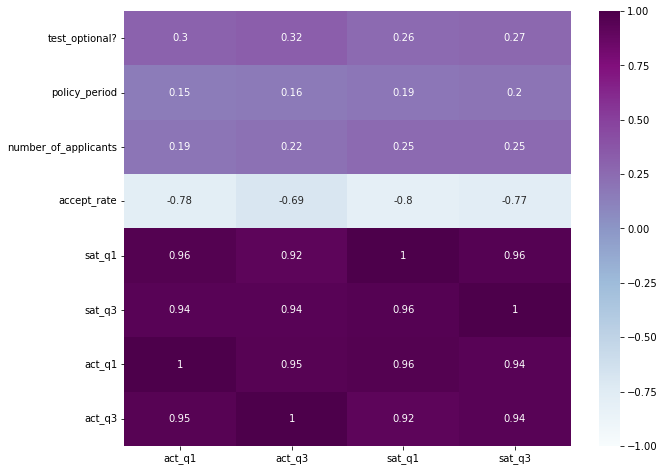

In [177]:
# Correlations for non-score factors in colleges
plt.figure(figsize=(10,8))
sns.heatmap(colleges.corr()[['act_q1', 'act_q3', 'sat_q1', 'sat_q3']], 
            vmin=-1, vmax=1,
            annot=True, cmap='BuPu');

This heatmap more clearly shows the very high positive relationships between admitted student scores. This could be inferred, since each row is for an individual school that his it's own criteria. This information could be useful to that want to compare themselves to a school with a similar profile.

In knowing the strong correlation between acceptance rate and ACT/SAT quartile scores, schools were compared based on these factors.

In [183]:
# Example of two comparable schools whose accept_score is 2 std from the mean
colleges.loc[colleges['accept_rate'] <= 0.073, :]

,school,test_optional?,policy_period,policy_details,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
0,Stanford University,1,1.0,Stanford has adopted a one-year test optional ...,47452,0.043,1440.0,1570.0,32.0,35.0
1,Harvard College,1,1.0,Harvard has adopted a one-year test optional p...,42749,0.047,1460.0,1580.0,33.0,35.0
2,Princeton University,1,1.0,Princeton has adopted a one-year test optional...,35370,0.055,1440.0,1570.0,32.0,35.0
3,Columbia University,1,1.0,Columbia has adopted a one-year test optional ...,40203,0.055,1450.0,1560.0,33.0,35.0
4,Yale University,1,1.0,Yale has adopted a one-year test optional poli...,36844,0.061,1460.0,1570.0,33.0,35.0
5,California Institute of Technology,0,2.0,CalTech has adopted a two-year Test Blind poli...,8367,0.064,1530.0,1560.0,35.0,36.0
6,Massachusetts Institute of Technology,1,1.0,MIT has adopted a one-year test optional polic...,21706,0.067,1500.0,1570.0,34.0,36.0
7,Brown University,1,1.0,Brown has adopted a one-year test optional pol...,38674,0.071,1440.0,1570.0,33.0,35.0
8,University of Chicago,1,0.0,UChicago offers a test optional policy which a...,32283,0.073,1490.0,1570.0,33.0,35.0


By pulling this data, it is clear that CalTech could be considered a test-optional school. For two years, starting in 2021, they had a 'Test Blind' policy. This addresses their position as an outlier in the SAT v ACT scatter plot, being the highest test-required point on the chart. 

Another unique row on this list is the University of Chicago being the only competitive school offering a permanent test-optional policy. If the other 8 high performing/highly competitive schools look to standardize their testing policies UChicago. This action would be recommended based on the disparities that could exist due to the negative trends in state participation and performance.

A counter-argument to this recommendation could be that some schools may benefit from exclusive and competitive acceptance rates and admitted scores. To that point, further research would have to be done on how, and if so, when low national scoring averages would impact their applicant pool. From here, the effect of these trends on costs could be addressed.

In [196]:
colleges.iloc[5,1] = 0

colleges.loc[colleges['accept_rate'] == 0.064, :]

,school,test_optional?,policy_period,policy_details,number_of_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3
5,California Institute of Technology,0,2.0,CalTech has adopted a two-year Test Blind poli...,8367,0.064,1530.0,1560.0,35.0,36.0


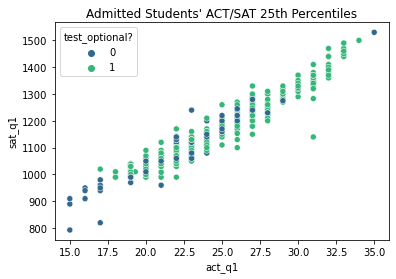

In [194]:
q1 = sns.scatterplot(data = colleges, x = 'act_q1', y = 'sat_q1', hue = 'test_optional?', 
                palette='viridis')
q1.set_title("Admitted Students' ACT/SAT 25th Percentiles");

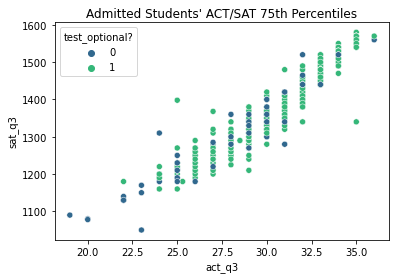

In [195]:
q3 = sns.scatterplot(data = colleges, x = 'act_q3', y = 'sat_q3', hue = 'test_optional?', 
                palette='viridis')
q3.set_title("Admitted Students' ACT/SAT 75th Percentiles");

These visualizations appear to show that schools without test-optional policies tend to have lower ranges in scores. Additional data on trends in test-optional schools' performances prior to test-optional policies may provide insights into the relationship between test_optional policies and scoring. It is also very possible that no relationship exists, as there is no correlation for this variable in the current dataset. 